In [1]:
import numpy as np
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf


In [2]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


No GPU found


# Load Dataset 

In [3]:
dataset = pd.read_csv('data_temp/100_gauge.csv', index_col=False)

In [5]:
dataset.shape
sequence_length =10

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create Sequences for the LSTM model 

In [7]:
dataset.sort_values(by=['ID', 'Timestamp'], inplace=True)

# Wähle die relevanten Merkmale und die Zielvariable
features = dataset.columns.difference(['ID', 'Timestamp', 'prec'])
target_variable = 'prec'

# Definiere die Sequenzlänge und den Anteil des Testsets
sequence_length = 30  # Beispielwert, anpassen nach Bedarf
test_size = 0.3  # Beispielwert, anpassen nach Bedarf

# Gruppiere nach Standorten und führe die Trainings-Test-Aufteilung durch
train_sequences, test_sequences = [], []
scalers = {}

for location, group in dataset.groupby('ID'):
    values = group[features].values
    target = group[target_variable].values

    # Skaliere die Daten nur auf den Trainingsdaten
    scaler = StandardScaler()
    values = scaler.fit_transform(values)
    scalers[location] = scaler

    # Führe die Trainings-Test-Aufteilung durch
    values_train, values_test, target_train, target_test = train_test_split(
        values, target, test_size=test_size, shuffle=False
    )

    for i in range(len(values_train) - sequence_length):
        seq = values_train[i:i+sequence_length, :]
        target_seq = target_train[i+sequence_length]
        train_sequences.append((seq, target_seq))

    for i in range(len(values_test) - sequence_length):
        seq = values_test[i:i+sequence_length, :]
        target_seq = target_test[i+sequence_length]
        test_sequences.append((seq, target_seq))

# Konvertiere die Sequenzen in NumPy-Arrays
X_train = np.array([seq for seq, _ in train_sequences])
y_train = np.array([target for _, target in train_sequences])

X_test = np.array([seq for seq, _ in test_sequences])
y_test = np.array([target for _, target in test_sequences])

# Die Form von X_train, X_test sollte (Anzahl der Sequenzen, sequence_length, Anzahl der Merkmale) sein
print(X_train.shape, X_test.shape)

# Die Form von y_train, y_test sollte (Anzahl der Sequenzen, ) sein
print(y_train.shape, y_test.shape)

(994000, 30, 87) (424400, 30, 87)
(994000,) (424400,)


# Create Model run different settings 

In [7]:
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [9]:
model = Sequential()
model.add(LSTM(units=30, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [10]:
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

31063/31063 [==============================] - 520s 16ms/step - loss: 26.1800 - rmse: 4.8513 - val_loss: 28.9493 - val_rmse: 4.9468


In [11]:
y_pred = model.predict(X_test)

13263/13263 [==============================] - 41s 3ms/step


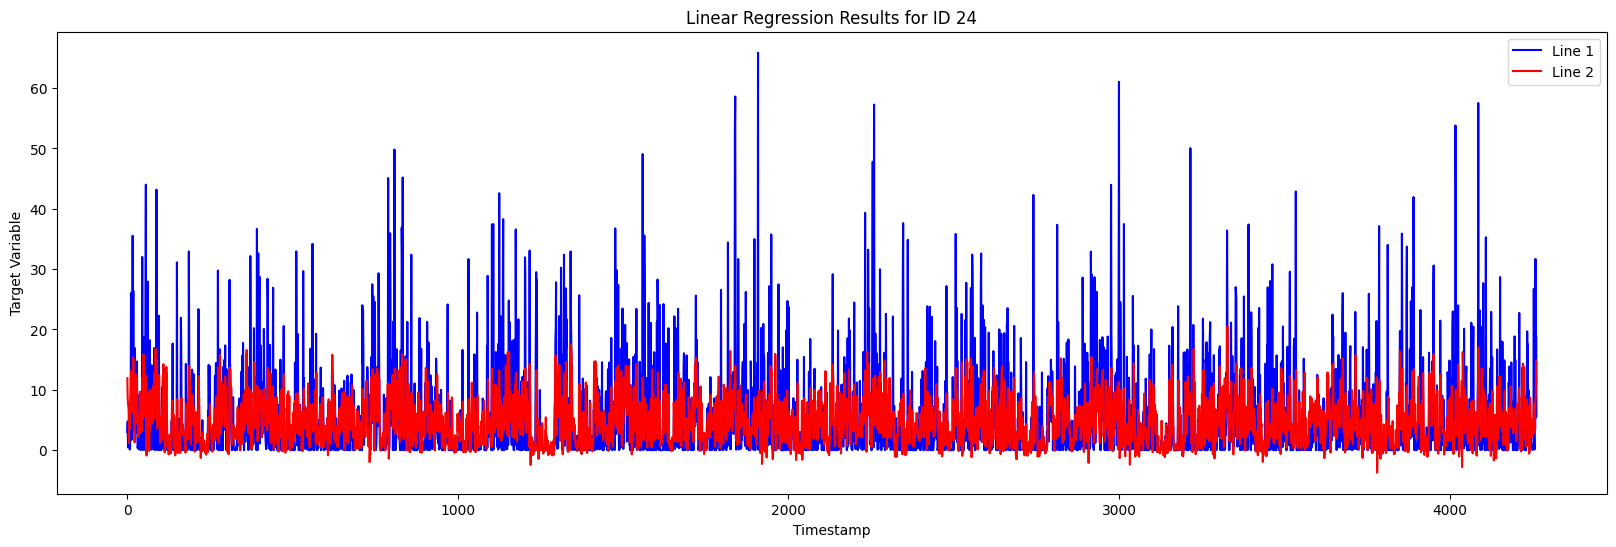

In [24]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [25]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [27]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
15532/15532 [==============================] - 303s 19ms/step - loss: 26.0098 - rmse: 4.9477 - val_loss: 28.6816 - val_rmse: 5.0177
Epoch 2/3
15532/15532 [==============================] - 259s 17ms/step - loss: 23.1447 - rmse: 4.6767 - val_loss: 30.6095 - val_rmse: 5.2009
Epoch 3/3
15532/15532 [==============================] - 228s 15ms/step - loss: 21.1952 - rmse: 4.4877 - val_loss: 31.0127 - val_rmse: 5.2366


In [28]:
y_pred2 = model.predict(X_test)

13263/13263 [==============================] - 45s 3ms/step


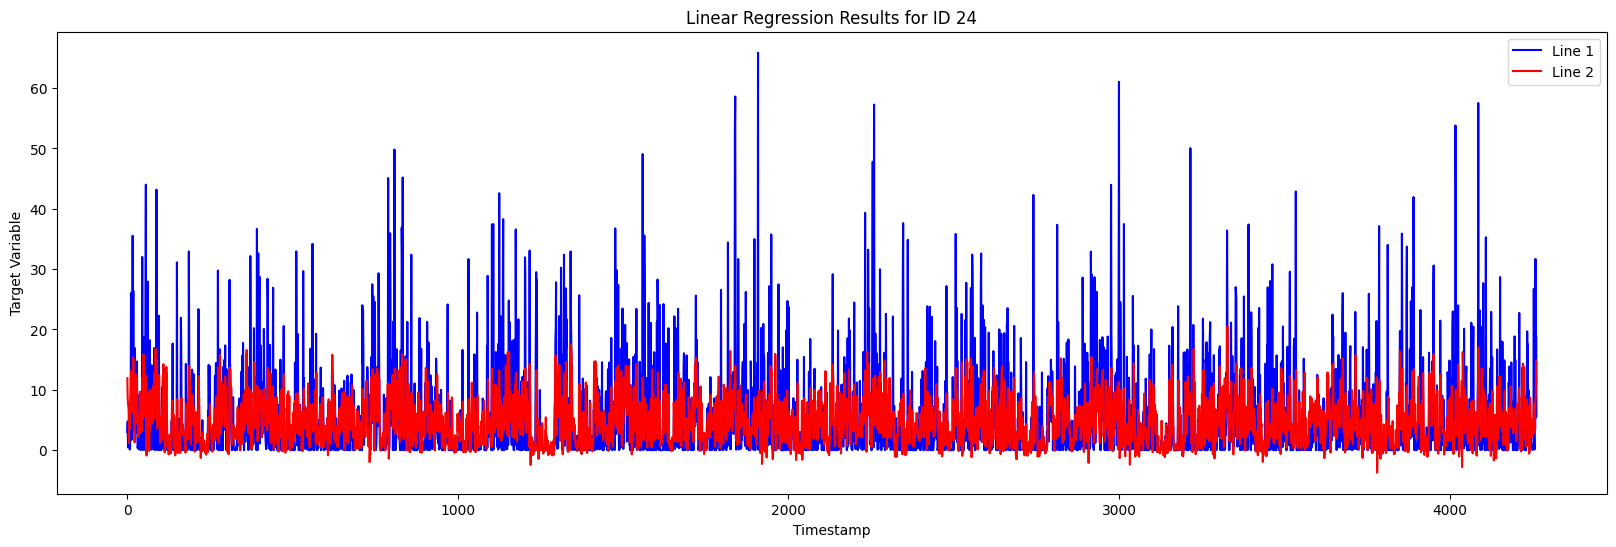

In [29]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred2[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [8]:
dataset.sort_values(by=['ID', 'Timestamp'], inplace=True)

# Wähle die relevanten Merkmale und die Zielvariable
features = dataset.columns.difference(['ID', 'Timestamp', 'prec'])
target_variable = 'prec'

# Definiere die Sequenzlänge und den Anteil des Testsets
sequence_length = 10  # Beispielwert, anpassen nach Bedarf
test_size = 0.3  # Beispielwert, anpassen nach Bedarf

# Gruppiere nach Standorten und führe die Trainings-Test-Aufteilung durch
train_sequences, test_sequences = [], []
scalers = {}

for location, group in dataset.groupby('ID'):
    values = group[features].values
    target = group[target_variable].values

    # Skaliere die Daten nur auf den Trainingsdaten
    scaler = StandardScaler()
    values = scaler.fit_transform(values)
    scalers[location] = scaler

    # Führe die Trainings-Test-Aufteilung durch
    values_train, values_test, target_train, target_test = train_test_split(
        values, target, test_size=test_size, shuffle=False
    )

    for i in range(len(values_train) - sequence_length):
        seq = values_train[i:i+sequence_length, :]
        target_seq = target_train[i+sequence_length]
        train_sequences.append((seq, target_seq))

    for i in range(len(values_test) - sequence_length):
        seq = values_test[i:i+sequence_length, :]
        target_seq = target_test[i+sequence_length]
        test_sequences.append((seq, target_seq))

# Konvertiere die Sequenzen in NumPy-Arrays
X_train = np.array([seq for seq, _ in train_sequences])
y_train = np.array([target for _, target in train_sequences])

X_test = np.array([seq for seq, _ in test_sequences])
y_test = np.array([target for _, target in test_sequences])

# Die Form von X_train, X_test sollte (Anzahl der Sequenzen, sequence_length, Anzahl der Merkmale) sein
print(X_train.shape, X_test.shape)

# Die Form von y_train, y_test sollte (Anzahl der Sequenzen, ) sein
print(y_train.shape, y_test.shape)

(996000, 10, 87) (426400, 10, 87)
(996000,) (426400,)


In [9]:
model = Sequential()
model.add(LSTM(units=60, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [10]:
history = model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_test, y_test))

7782/7782 [==============================] - 84s 10ms/step - loss: 26.2520 - rmse: 5.0352 - val_loss: 28.7689 - val_rmse: 5.1253


In [11]:
y_pred3 = model.predict(X_test)

13325/13325 [==============================] - 31s 2ms/step


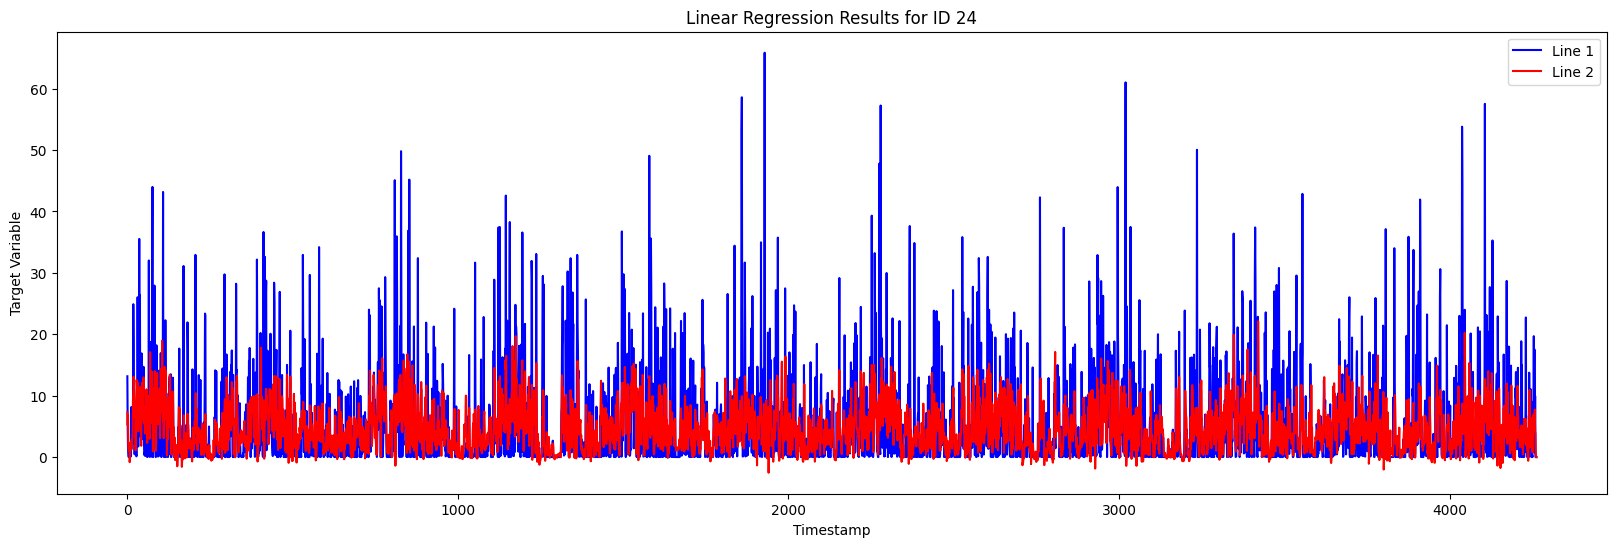

In [12]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred3[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [13]:
model = Sequential()
model.add(LSTM(units=30, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [14]:
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

31125/31125 [==============================] - 150s 5ms/step - loss: 26.3569 - rmse: 4.8704 - val_loss: 28.4774 - val_rmse: 4.8990


In [15]:
y_pred4 = model.predict(X_test)

13325/13325 [==============================] - 29s 2ms/step


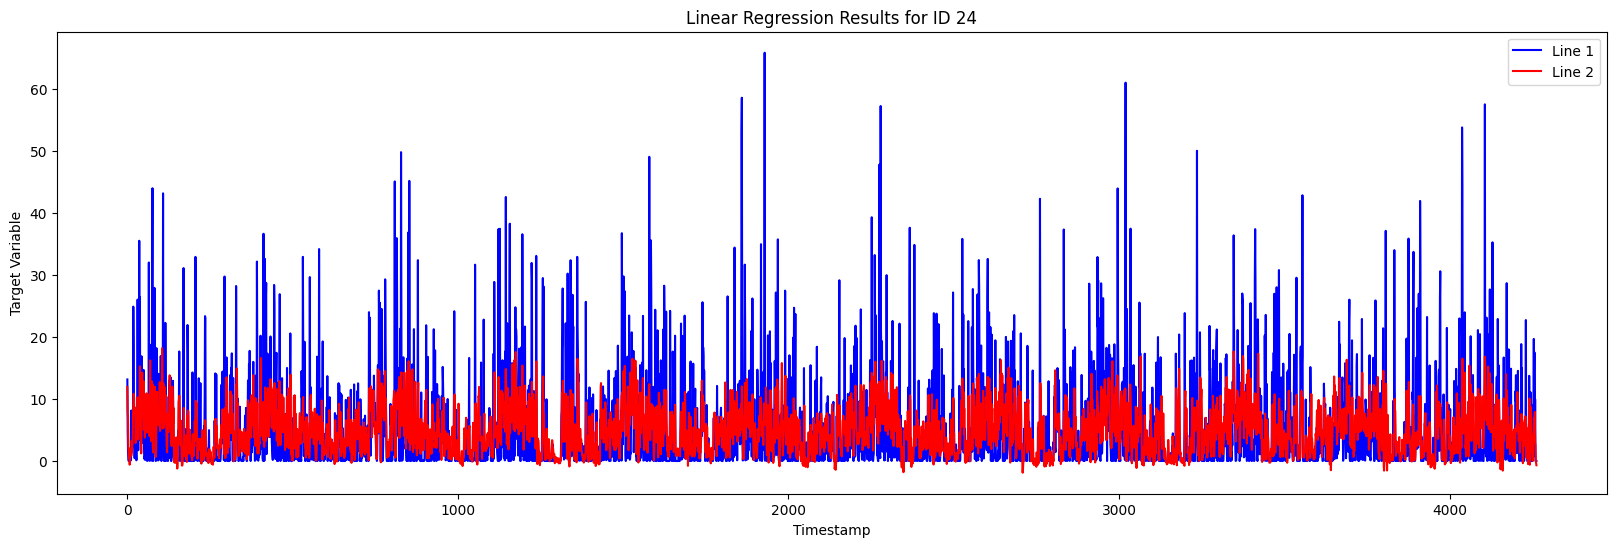

In [17]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred4[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [18]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [19]:
history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test))

62250/62250 [==============================] - 242s 4ms/step - loss: 27.0990 - rmse: 4.7646 - val_loss: 28.1261 - val_rmse: 4.6863


In [20]:
y_pred5 = model.predict(X_test)

13325/13325 [==============================] - 27s 2ms/step


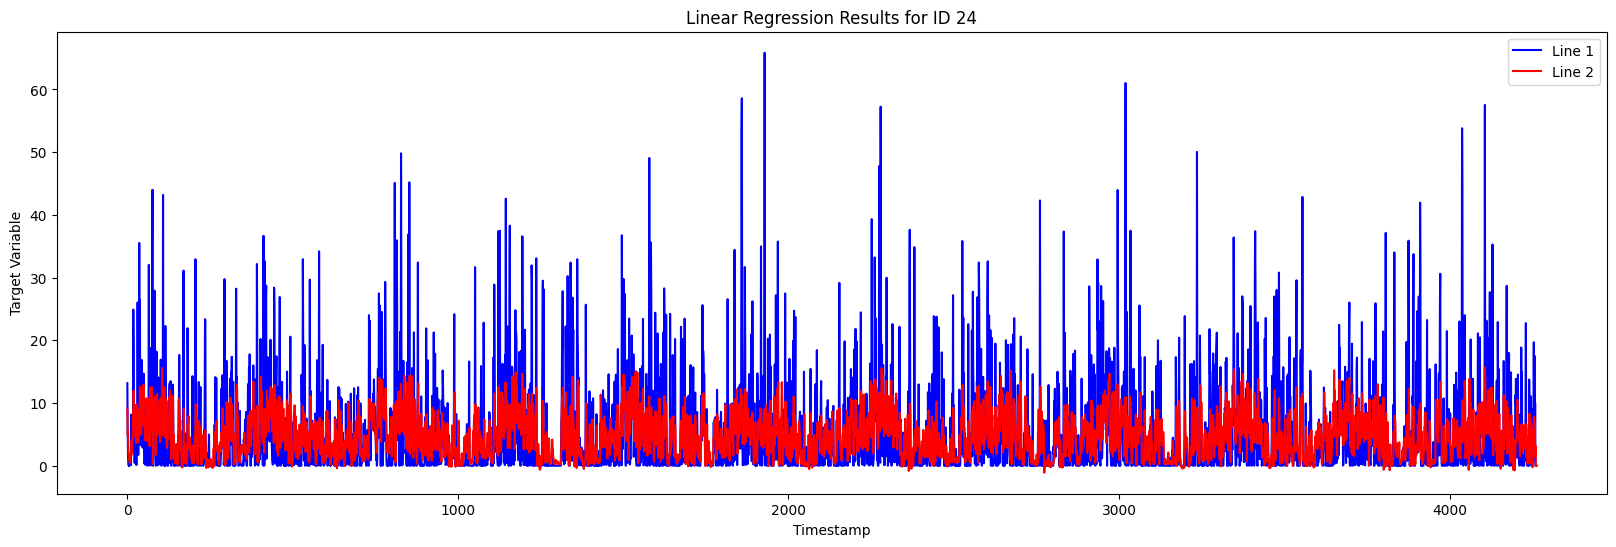

In [21]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred5[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [22]:
model = Sequential()
model.add(LSTM(units=5, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [23]:
history = model.fit(X_train, y_train, epochs=1, batch_size=8, validation_data=(X_test, y_test))

124500/124500 [==============================] - 445s 4ms/step - loss: 27.8952 - rmse: 4.5852 - val_loss: 28.8761 - val_rmse: 4.4689


In [24]:
y_pred6 = model.predict(X_test)

13325/13325 [==============================] - 23s 2ms/step


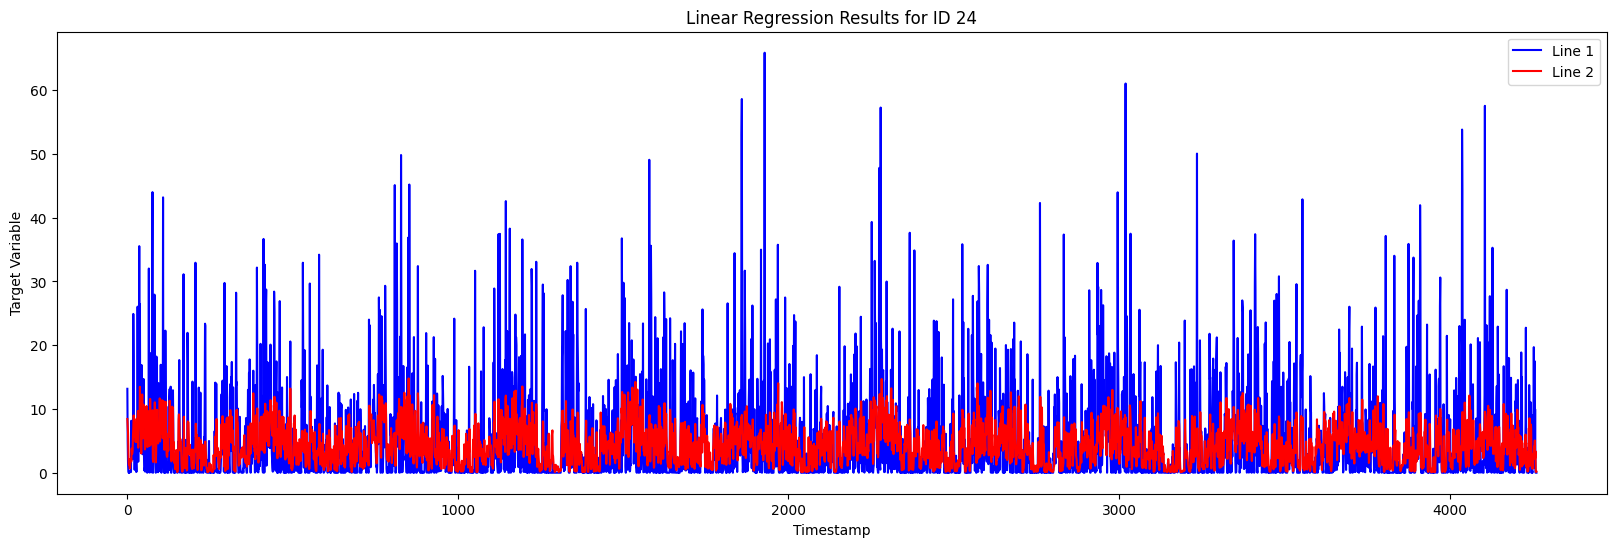

In [25]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Line 1', color='blue')
plt.plot(range(0,4264), y_pred6[:4264], label='Line 2', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [26]:
model = Sequential()
model.add(LSTM(units=1, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [27]:
history = model.fit(X_train, y_train, epochs=1, batch_size=4, validation_data=(X_test, y_test))

249000/249000 [==============================] - 817s 3ms/step - loss: 29.2726 - rmse: 4.3557 - val_loss: 30.2067 - val_rmse: 4.2359


In [28]:
y_pred7 = model.predict(X_test)

13325/13325 [==============================] - 20s 1ms/step


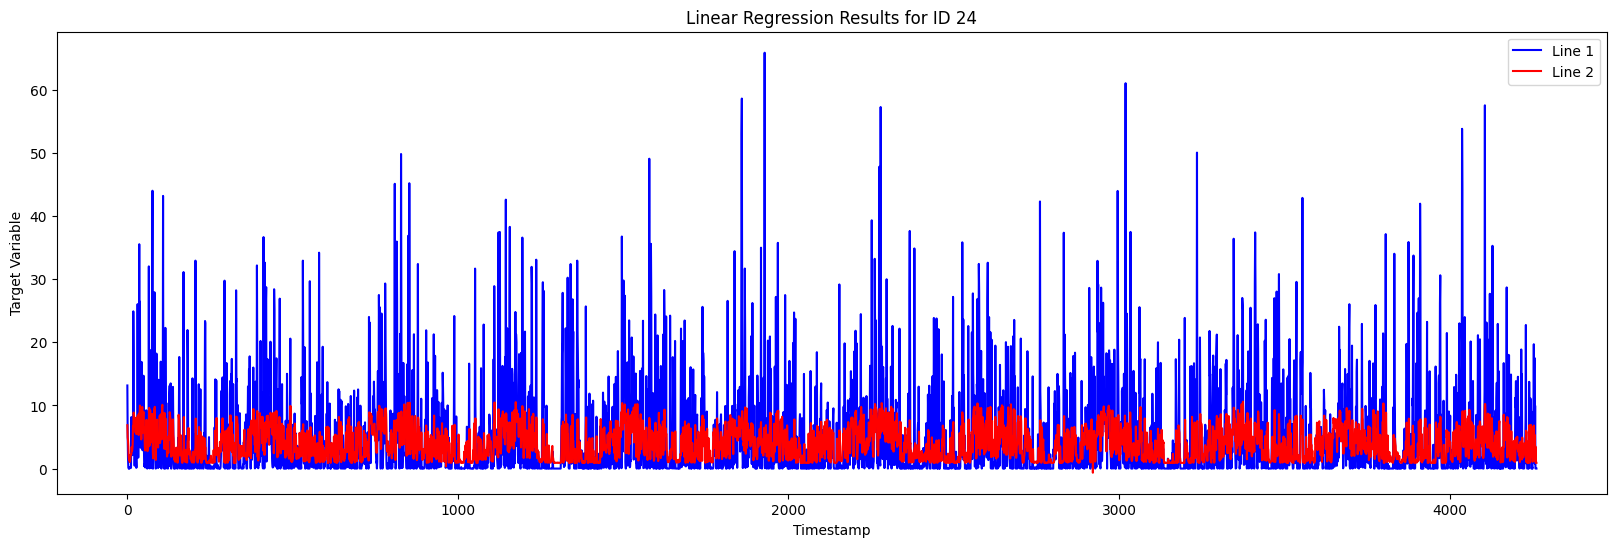

In [29]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264],  label='Actual', color='blue')
plt.plot(range(0,4264), y_pred7[:4264], label='Predicted', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()

In [30]:
model = Sequential()
model.add(LSTM(units=1, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Anzahl der Ausgabemerkmale

# Kompiliere das Modell
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])

In [31]:
history = model.fit(X_train, y_train, epochs=3, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/3
249000/249000 [==============================] - 730s 3ms/step - loss: 29.3267 - rmse: 4.3578 - val_loss: 30.3510 - val_rmse: 4.2734
Epoch 2/3
249000/249000 [==============================] - 732s 3ms/step - loss: 28.5814 - rmse: 4.3136 - val_loss: 30.0097 - val_rmse: 4.2811
Epoch 3/3
249000/249000 [==============================] - 662s 3ms/step - loss: 28.4116 - rmse: 4.3003 - val_loss: 30.1226 - val_rmse: 4.1912


In [34]:
y_pred8 = model.predict(X_test)

13325/13325 [==============================] - 16s 1ms/step


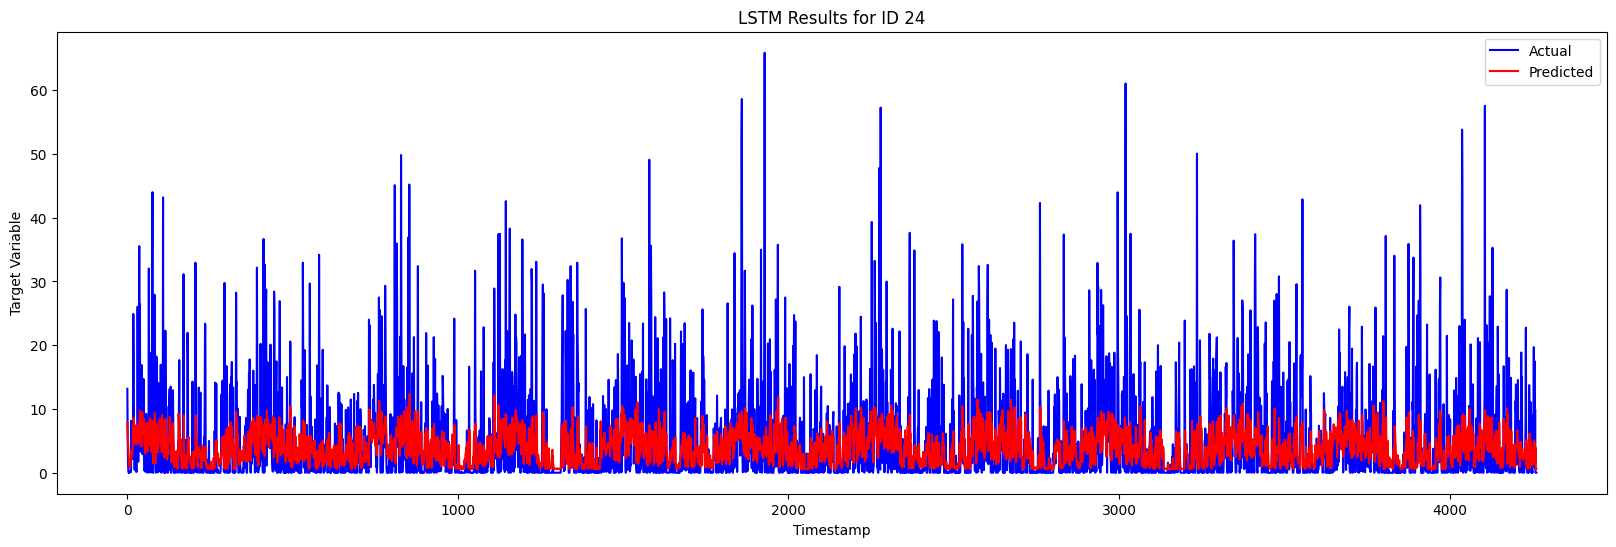

In [37]:
plt.figure(figsize=(20, 6))

plt.plot(range(0,4264), y_test[:4264], label='Actual', color='blue')
plt.plot(range(0,4264), y_pred8[:4264], label='Predicted', color='red')

# Beschriftungen und Legende hinzufügen
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'LSTM Results for ID 24')
plt.legend()

# Anzeigen des Plots
plt.show()